# **<font color="turquoise">Описание проекта</font>**:</font>
Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки.  
Сотни перелётов каждый день.  
Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.  
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали. 

# **В работе два датасета**:  

**/datasets/query_1.csv** — результат первого запроса, в нем содержится информация о:  

- model — модели самолета,    
- flights_amount — количество рейсов для каждой модели самолетов в сентябре 2018 года  

**/datasets/query_3.csv** - результат третьего запроса, в нём содержится информация о:    

- city — городах,    
- average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года  

Для этих двух наборов данных нужно:  

 - импортировать файлы;  
 - изучить данные в них;  
 - проверить типы данных на корректность;  
 - выбрать топ-10 городов по количеству рейсов;  
 - построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;  
 - сделать выводы по каждому из графиков, пояснить результат.  

### **Описание данных**:  

***База данных об авиаперевозках***:  

Таблица airports — информация об аэропортах:  

- airport_code — трёхбуквенный код аэропорта  
- airport_name — название аэропорта  
- city — город  
- timezone — временная зона  

Таблица aircrafts — информация об самолётах:  

- aircraft_code — код модели самолёта  
- model — модель самолёта  
  range — количество самолётов  
  
Таблица tickets — информация о билетах:  

- ticket_no — уникальный номер билета  
- passenger_id — персональный идентификатор пассажира  
- passenger_name — имя и фамилия пассажира  

Таблица flights — информация о рейсах:  

- flight_id — уникальный идентификатор рейса  
- departure_airport — аэропорт вылета  
- departure_time — дата и время вылета  
- arrival_airport — аэропорт прилёта  
- arrival_time — дата и время прилёта  
- aircraft_code – id самолёта  

Таблица ticket_flights — стыковая таблица «рейсы-билеты»  

- ticket_no — номер билета  
- flight_id — идентификатор рейса  
- Таблица festivals — информация о фестивалях  
- festival_id — уникальный номер фестиваля  
- festival_date — дата проведения фестиваля  
- festival_city — город проведения фестиваля  
- festival_name — название фестиваля 

Импортируем библиотеки:  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Получим файлы с данными:  

In [2]:
data_flights = pd.read_csv('датасет1')
data_city  = pd.read_csv('датасет2')

Посмотрим на датафреймы:  

In [3]:
data_flights.head(10)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


В F9 используются 8 моделей самолетов

In [4]:
data_city.head(10)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


Посмотрим снизу:  

In [5]:
data_city.tail(10)

,city,average_flights
91,Хабаровск,6.548387
92,Ханты-Мансийск,8.419355
93,Чебоксары,5.000000
94,Челябинск,6.709677
95,Череповец,2.161290
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935
100,Ярославль,1.322581


Городов, куда летает F9, значительно больше.

Получим общую информацию о датасетах:  

In [6]:
data_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


С данными в датасете с моделями и количеством рейсов с типом данных и пропусками все в порядке.

In [7]:
data_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


В датасете с данными о городах и среднем количестве рейсов, также все в порядке. Тип float64 в количестве рейсов, вполне естественнен, среднее количество может быть и не целым числом.

Файлы импортированы, данные проверены.

Удалим возможные дубликаты:  

In [8]:
data_city.drop_duplicates().reset_index(drop = True)

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


И еще раз посмотрим на датасет:  

In [9]:
data_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Дубликатов не обнаружено:  

Найдем топ-10 городов по количеству рейсов:  

In [10]:
data_city = data_city.sort_values(by='average_flights', ascending=False)

In [11]:
print(data_city)

                        city  average_flights
43                    Москва       129.774194
70           Санкт-Петербург        31.161290
54               Новосибирск        17.322581
33                Красноярск        11.580645
20              Екатеринбург        11.322581
..                       ...              ...
22                    Ижевск         1.000000
65  Петропавловск-Камчатский         1.000000
31      Комсомольск-на-Амуре         1.000000
58                    Нягань         1.000000
49               Нефтеюганск         1.000000

[101 rows x 2 columns]


In [12]:
data_city.iloc[0:10]

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


Топ-10 городов по количеству рейсов выбраны. Вполне ожидаемо Москва, С-Пб, Новосибирск, неожиданно появился Ульяновск.

Построим графики:  

График модели самолетов и количество рейсов

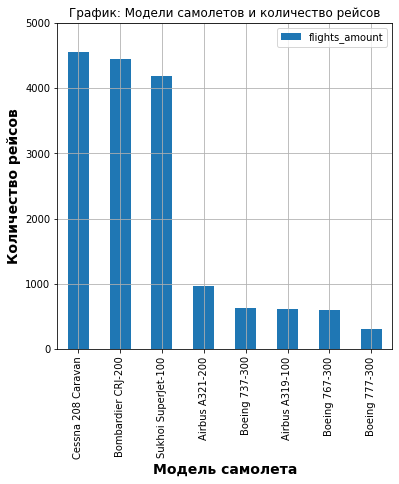

In [13]:
data_flights = data_flights.sort_values(by='flights_amount', ascending=False)
data_flights.plot(kind='bar', x='model', y='flights_amount', ylim=(0, 5000), grid=True, figsize = (6, 6))
plt.xlabel('Модель самолета', fontsize=14, fontweight="bold")
plt.ylabel('Количество рейсов', fontsize=14, fontweight="bold")
plt.title('График: Модели самолетов и количество рейсов');

Получился интересный график, так выяснилось, что самыми популярными моделями воздушных судов, в сентябрь 2018 года являлись
Cessna 208 Caravan - - небольшие самолеты на 9-13 мест, в основном используются авиакомпаниями в Сибири,
Bombardier CRJ-200 - самолет на 50 мест,
Sukhoi SuperJet-100 - вместимость - 98 мест.

График города и количество рейсов

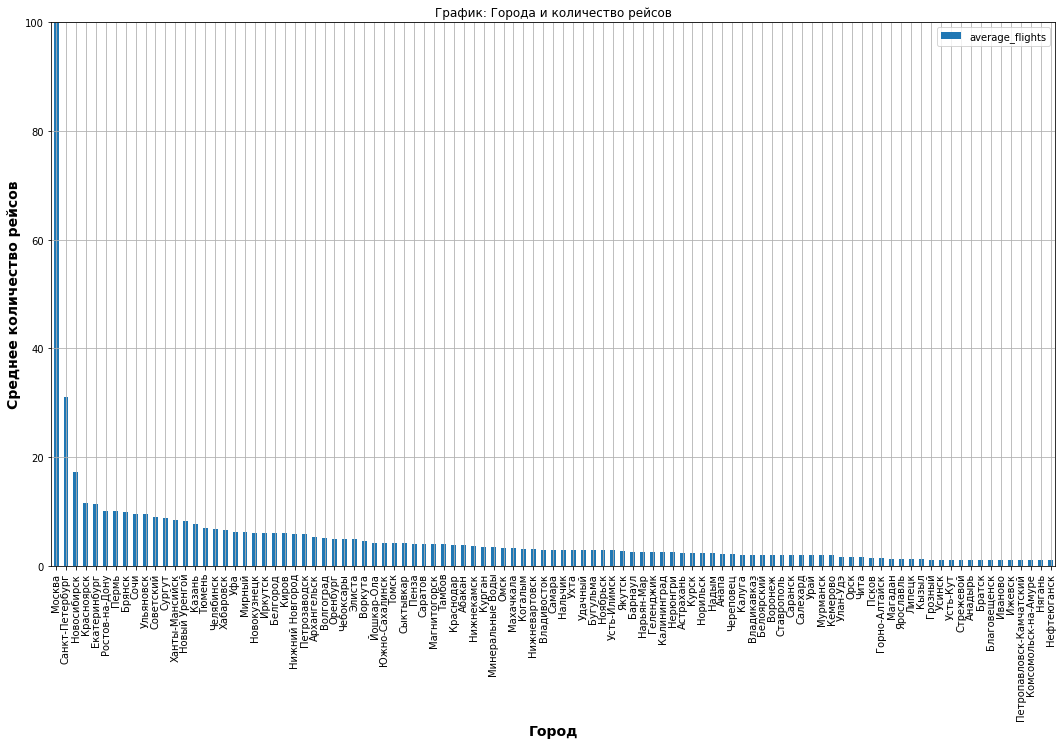

In [14]:
data_city.plot(kind='bar', x='city', y='average_flights', ylim=(0, 100), grid=True, figsize = (18, 10))
plt.xlabel('Город', fontsize=14, fontweight="bold")
plt.ylabel('Среднее количество рейсов', fontsize=14, fontweight="bold")
plt.title('График: Города и количество рейсов');

Москва, значительно, лидирует по популярности рейсов, вероятно, летят не только на фестивали, а еще по каким-то причинам, в частности и потому что Москва - фактически пересадочный хаб. Интересно было бы это проанализиовать в дальнейшем. А в Нефтеюганск и Нягань, всего по одному рейсу в сентябре, видимо, бархатный сезон там не очень.

Выберем ТОП-10 городов и количество рейсов:  

In [15]:
data_city_top10 = data_city.iloc[0:10]

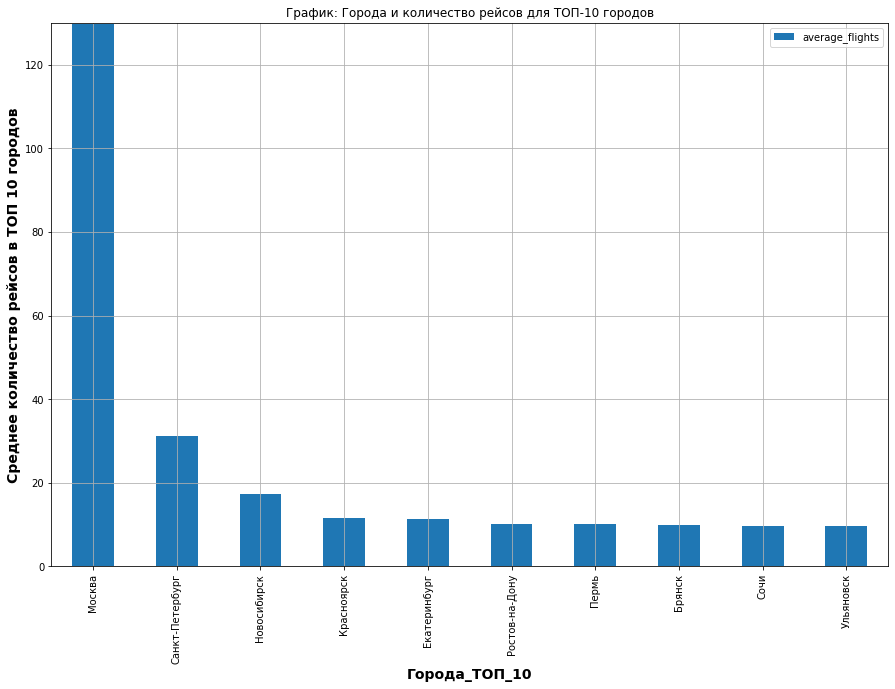

In [16]:
data_city_top10.plot(kind='bar', x='city', y='average_flights', ylim=(0, 130), grid=True, figsize = (15, 10))
plt.xlabel('Города_ТОП_10', fontsize=14, fontweight="bold")
plt.ylabel('Среднее количество рейсов в ТОП 10 городов', fontsize=14, fontweight="bold")
plt.title('График: Города и количество рейсов для ТОП-10 городов');

Если посмотреть подробнее, то видно, что рейсов, прибывающих не в Москву исчезающе мало.

## **Выводы**:  

Были изучены данные по количеству перелетов за сентябрь 2018 года по каждой модели самолета.  

Выяснилось, что самыми используемыми моделями самолета являются Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100, что обусловлено, во многом малой вместимостью этих воздушных судов и вероятно короткими маршрутами перелетов.  

Можно придти к выводу, что в дни фестивалей, спрос, в городах их проведения, кардинально не увеличивается,  аэропорты Москвы, других крупных городов, в основном используются, как хаб.  